https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda/notebook

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

import os
print(os.listdir("/Users/r0m00tf/Downloads/datasets/ww2"))
import warnings            
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot')

['.DS_Store', 'weatherww2', 'world war 2 bombings operations.csv']


In [2]:
#load the data
#bombing data
aerial = pd.read_csv("/Users/r0m00tf/Downloads/datasets/ww2/world war 2 bombings operations.csv")
weather_station_location = pd.read_csv("/Users/r0m00tf/Downloads/datasets/ww2/weatherww2/Weather Station Locations.csv")
weather = pd.read_csv("/Users/r0m00tf/Downloads/datasets/ww2/weatherww2/Summary of Weather.csv")


In [3]:
aerial.head()

Mission ID Mission Date Theater of Operations Country Air Force  \
0           1    8/15/1943                   MTO     USA     12 AF   
1           2    8/15/1943                   PTO     USA      5 AF   
2           3    8/15/1943                   MTO     USA     12 AF   
3           4    8/15/1943                   MTO     USA     12 AF   
4           5    8/15/1943                   PTO     USA      5 AF   

         Unit ID Aircraft Series Callsign Mission Type          Takeoff Base  \
0  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
1         400 BS             B24      NaN            1                   NaN   
2  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
3  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
4         321 BS             B24      NaN            1                   NaN   

  Takeoff Location Takeoff Latitude  Takeoff Longitude Target ID  \
0           SICILY        37.131022          14.321464     40675   
1              NaN              NaN                NaN       NaN   
2           SICILY        37.131022          14.321464      9630   
3           SICILY        37.131022          14.321464     16140   
4              NaN              NaN                NaN       NaN   

  Target Country  Target City Target Type Target Industry Target Priority  \
0          ITALY    SPADAFORA         NaN             NaN             NaN   
1     NEW GUINEA     KOMIATUM       RIDGE             NaN               1   
2          ITALY      COSENZA         NaN             NaN             NaN   
3          ITALY  GIOJA TAURO         NaN             NaN             NaN   
4        SUMATRA         KILA     VILLAGE             NaN               1   

   Target Latitude  Target Longitude  Altitude (Hundreds of Feet)  \
0        38.220000         15.370000                          NaN   
1        -7.166667        147.000000                         44.0   
2        39.270000         16.250000                          NaN   
3        38.430000         15.900000                          NaN   
4        -1.116667        103.883333                         60.0   

   Airborne Aircraft  Attacking Aircraft  Bombing Aircraft  Aircraft Returned  \
0               20.0                 NaN              20.0                NaN   
1                NaN                 6.0               NaN                NaN   
2               18.0                 NaN              36.0                NaN   
3               15.0                 NaN              15.0                NaN   
4                NaN                 6.0               NaN                NaN   

   Aircraft Failed  Aircraft Damaged  Aircraft Lost  High Explosives  \
0              NaN               NaN            NaN             40.0   
1              NaN               NaN            NaN             40.0   
2              NaN               NaN            NaN             36.0   
3              1.0               NaN            NaN             30.0   
4              NaN               NaN            NaN             16.0   

      High Explosives Type High Explosives Weight (Pounds)  \
0   500 LB GP (GP-M43/M64)                             NaN   
1  1000 LB GP (GP-M44/M65)                             NaN   
2   500 LB GP (GP-M43/M64)                             NaN   
3   500 LB GP (GP-M43/M64)                             NaN   
4  1000 LB GP (GP-M44/M65)                             NaN   

   High Explosives Weight (Tons)  Incendiary Devices Incendiary Devices Type  \
0                           10.0                 NaN                     NaN   
1                           20.0                 NaN                     NaN   
2                            9.0                 NaN                     NaN   
3                            7.5                 NaN                     NaN   
4                            8.0                 NaN                     NaN   

   Incendiary Devices Weight (Pounds)  I

In [4]:
weather_station_location.head()

WBAN            NAME STATE/COUNTRY ID    LAT     LON  ELEV   Latitude  \
0  33013          AIN EL               AL  3623N  00637E   611  36.383333   
1  33031        LA SENIA               AL  3537N  00037E    88  35.616667   
2  33023  MAISON BLANCHE               AL  3643N  00314E    23  36.716667   
3  33044        TELERGMA               AL  3607N  00621E   754  36.116667   
4  12001         TINDOUF               AL  2741N  00809W   443  27.683333   

   Longitude  
0   6.650000  
1   0.583333  
2   3.216667  
3   6.416667  
4  -8.083333

In [5]:
weather.head()

STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  MO  DA  PRCP  DR  SPD   MAX   MIN   MEA SNF  SND  \
0        0         NaN  42   7   1  0.04 NaN  NaN  78.0  72.0  75.0   0  NaN   
1        0         NaN  42   7   2     0 NaN  NaN  84.0  71.0  78.0   0  NaN   
2        0         NaN  42   7   3   0.1 NaN  NaN  79.0  72.0  76.0   0  NaN   
3        0         NaN  42   7   4   0.1 NaN  NaN  80.0  72.0  76.0   0  NaN   
4        0         NaN  42   7   5     0 NaN  NaN  80.0  71.0  76.0   0  NaN   

   FT  FB  FTI  ITH  PGT TSHDSBRSGF  SD3  RHX  RHN  RVG  WTE  
0 NaN NaN  NaN  NaN  NaN        NaN  NaN  NaN  NaN  NaN  NaN  
1 NaN NaN  NaN  NaN  NaN        NaN  NaN  NaN  NaN  NaN  NaN  
2 NaN NaN  NaN  NaN  NaN        NaN  NaN  NaN  NaN  NaN  NaN  
3 NaN NaN  NaN  NaN  NaN        NaN  NaN  NaN  NaN  NaN  NaN  
4 NaN NaN  NaN  NaN  NaN        NaN  NaN  NaN  NaN  NaN  NaN

Description of features planning to be used:
Aerial:
1. Mission Date: Date of the mission
2. Theator of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"
3. Country
4. Airforce: Name or id of air force unity like 5AF
5. Aircraft Series: Model or type of aircraft like B24
6. Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
7. Takeoff Base: Takeoff airport name like Ponte Olivo Airfield
8. Takeoff Location: takeoff region Sicily
9. Takeoff Latitude: Latitude of takeoff region
10. Takeoff Longitude: Longitude of takeoff region
11. Target Country: Target country like Germany
12. Target City: Target city like Berlin
13. Target Type: Type of target like city area
14. Target Industry: Target industy like town or urban
15. Target Priority: Target priority like 1 (most)
16. Target Latitude: Latitude of target
17. Target Longitude: Longitude of target

Weather station location:
1. WBAN: Weather station number
2. NAME: weather station name
3. STATE/COUNTRY ID: acronym of countries
4. Latitude: Latitude of weather station
5. Longitude: Longitude of weather station
Weather:
1. STA: eather station number (WBAN)
2. Date: Date of temperature measurement
3. MeanTemp: Mean temperature

### Data Cleaning
Aerial Bombing data includes a lot of NaN values.So dropping them to ease visualization process.
-  Drop countries that are NaN
-  Drop if target longitude is NaN
-  Drop if takeoff longitude is NaN
-  Drop unused features

In [6]:
#drop countries that are NaN
aerial = aerial[pd.isna(aerial["Country"])== False]
#Drop if target longitude is NaN
aerial = aerial[pd.isna(aerial["Target Longitude"]) == False]
#Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial["Takeoff Longitude"]) == False]
#drop unused features
drop_list = ["Mission ID", "Unit ID", "Target ID","Altitude (Hundreds of Feet)","Airborne Aircraft",
            "Attacking Aircraft","Bombing Aircraft","Aircraft Returned","Aircraft Failed","Aircraft Damaged",
            "Aircraft Lost","High Explosives","High Explosives Type","Mission Type","High Explosives Weight (Pounds)",
            "High Explosives Weight (Tons)","Incendiary Devices","Incendiary Devices Type","Incendiary Devices Weight (Pounds)",
            "Incendiary Devices Weight (Tons)","Fragmentation Devices","Fragmentation Devices Type",
             "Fragmentation Devices Weight (Pounds)","Fragmentation Devices Weight (Tons)","Total Weight (Pounds)",
            "Total Weight (Tons)","Time Over Target","Bomb Damage Assessment","Source ID"]
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
Mission Date             2555 non-null object
Theater of Operations    2555 non-null object
Country                  2555 non-null object
Air Force                2505 non-null object
Aircraft Series          2528 non-null object
Callsign                 10 non-null object
Takeoff Base             2555 non-null object
Takeoff Location         2555 non-null object
Takeoff Latitude         2555 non-null object
Takeoff Longitude        2555 non-null float64
Target Country           2499 non-null object
Target City              2552 non-null object
Target Type              602 non-null object
Target Industry          81 non-null object
Target Priority          230 non-null object
Target Latitude          2555 non-null float64
Target Longitude         2555 non-null float64
dtypes: float64(3), object(14)
memory usage: 359.3+ KB


In [7]:
#doing the same with weather data
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [8]:
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


### Data Visualization

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


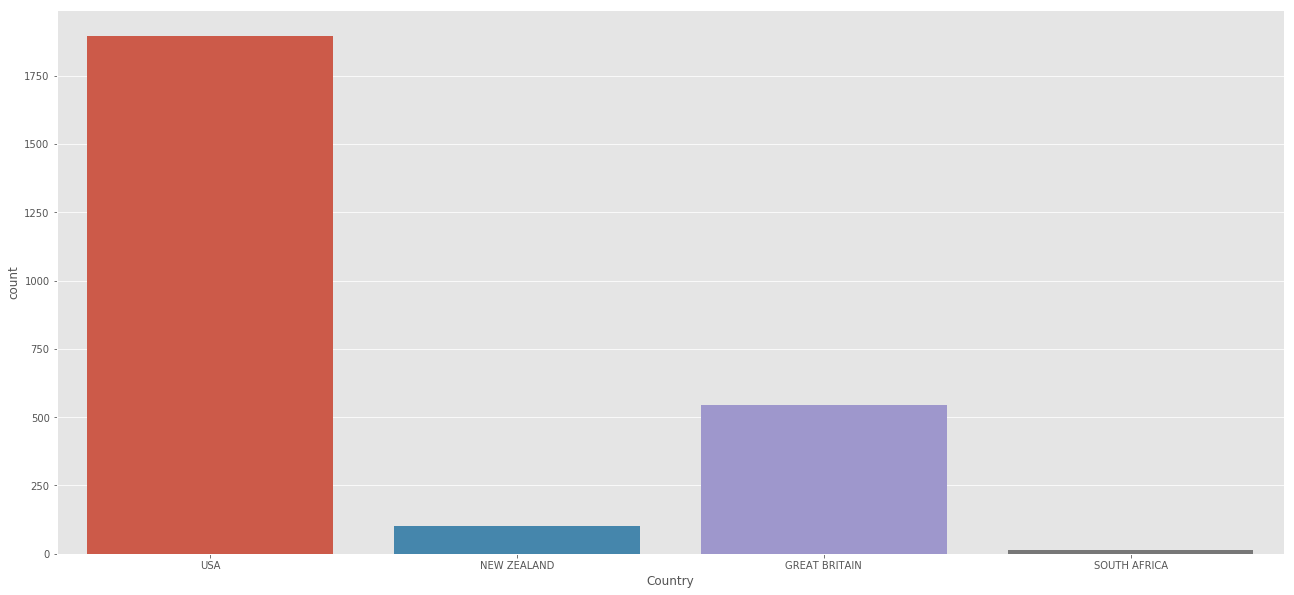

In [9]:
#country which attacks
print(aerial["Country"].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial["Country"])
plt.show()

ITALY                         1104
BURMA                          335
LIBYA                          272
TUNISIA                        113
GREECE                          87
EGYPT                           80
JAPAN                           71
CHINA                           52
SICILY                          46
GERMANY                         41
SOLOMON ISLANDS                 37
CRETE                           30
BISMARK ARCHIPELAGO             29
INDONESIA                       28
ETHIOPIA                        27
ERITREA                         21
PANTELLARIA                     20
PHILIPPINE ISLANDS              19
BALI                            19
THAILAND OR SIAM                16
FRENCH INDO CHINA               10
ANDAMAN ISLANDS                  8
SUDAN                            7
GILBERT ISLANDS                  6
NEW GUINEA                       4
BOUGAINVILLE                     3
FORMOSA AND RYUKYU ISLANDS       3
FRANCE                           3
SOMALIA             

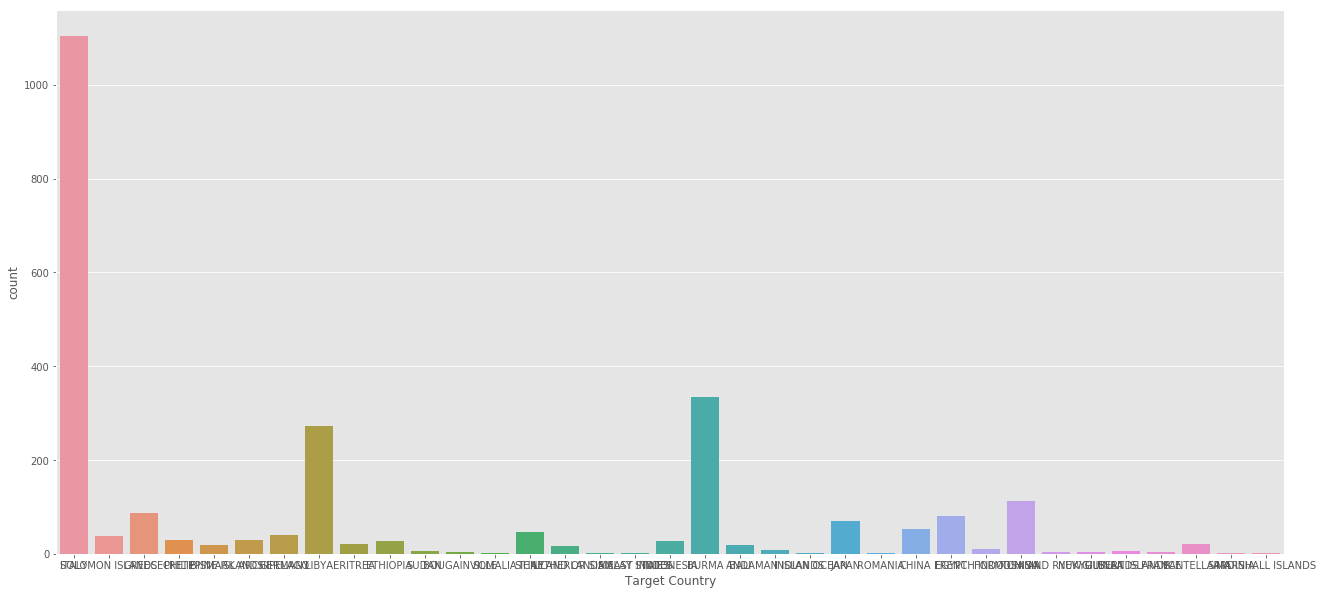

In [10]:
#top target countries
print(aerial["Target Country"].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial["Target Country"])
plt.show()

In [11]:
#learn more about the aircraft series that were used
data = aerial["Aircraft Series"].value_counts()
print(data[:10])
data = [go.Bar(
               x=data[:10].index,
               y=data[:10].values,
               hoverinfo="text",
               marker = dict(color = 'rgba(177, 14, 22, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
)]
layout = dict(
    title = 'Aircraft Series',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


In [12]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [13]:
#bombing paths
# Bombing paths
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]

targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        

flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


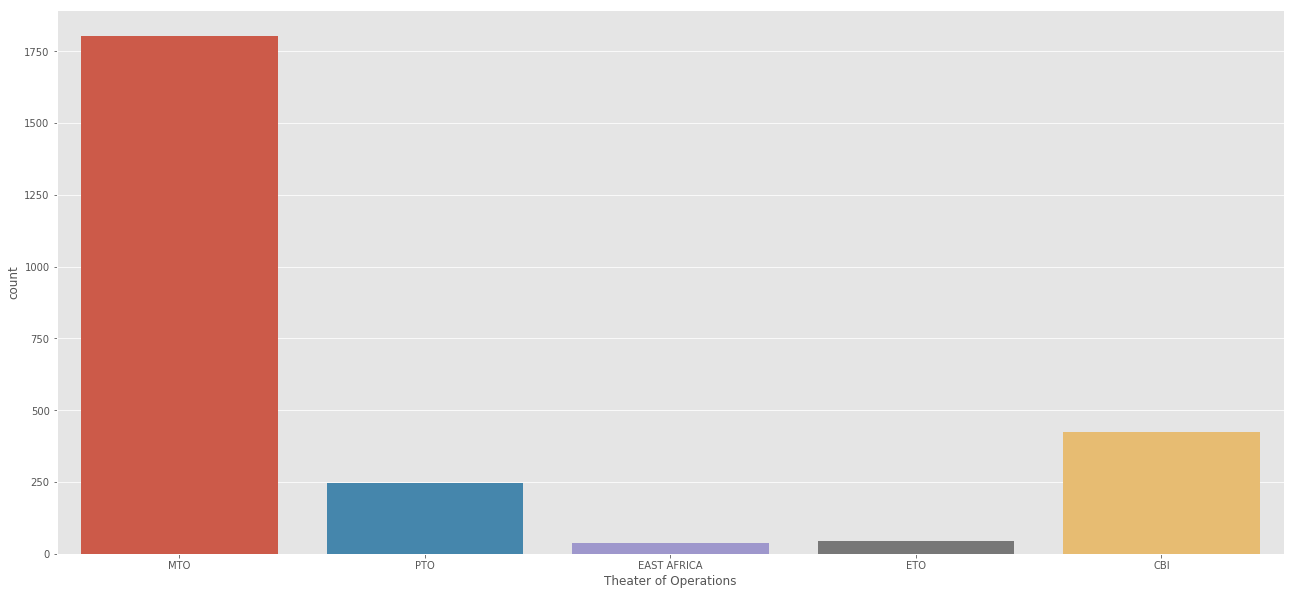

In [14]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(aerial['Theater of Operations'])
plt.show()

In [15]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


-  Lets focus on the USA and Burma War
-  In this warn USA bombs Burma(Katha City) from 1942 to 1945
-  The closest weather station is Bindukuri and it has temperature recorded from 1943 to 1945
-  Visualizing this situation


In [16]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN

In [17]:
weather_station_id

70    32907
Name: WBAN, dtype: int64

In [18]:
weather_bin = weather[weather.STA == 32907]
weather_bin


STA        Date   MeanTemp
78252  32907   1943-5-11  28.888889
78253  32907   1943-5-12  25.555556
78254  32907   1943-5-13  24.444444
78255  32907   1943-5-14  23.888889
78256  32907   1943-5-15  27.777778
78257  32907   1943-5-16  26.666667
78258  32907   1943-5-17  24.444444
78259  32907   1943-5-18  24.444444
78260  32907   1943-5-19  24.444444
78261  32907   1943-5-20  24.444444
78262  32907   1943-5-21  24.444444
78263  32907   1943-5-22  24.444444
78264  32907   1943-5-23  25.555556
78265  32907   1943-5-24  27.222222
78266  32907   1943-5-25  26.666667
78267  32907   1943-5-26  25.555556
78268  32907   1943-5-27  23.333333
78269  32907   1943-5-28  25.555556
78270  32907   1943-5-29  27.777778
78271  32907   1943-5-30  30.000000
78272  32907   1943-5-31  28.333333
78273  32907    1943-6-1  28.333333
78274  32907    1943-6-2  27.777778
78275  32907    1943-6-3  27.222222
78276  32907    1943-6-4  28.888889
78277  32907    1943-6-5  26.666667
78278  32907    1943-6-6  26.666667
78279  32907    1943-6-7  27.777778
78280  32907    1943-6-8  27.777778
78281  32907    1943-6-9  26.666667
78282  32907   1943-6-10  27.777778
78283  32907   1943-6-11  30.000000
78284  32907   1943-6-12  27.777778
78285  32907   1943-6-13  26.666667
78286  32907   1943-6-14  28.333333
78287  32907   1943-6-15  29.444444
78288  32907   1943-6-16  26.666667
78289  32907   1943-6-17  27.777778
78290  32907   1943-6-18  28.888889
78291  32907   1943-6-19  27.777778
78292  32907   1943-6-20  28.333333
78293  32907   1943-6-21  28.333333
78294  32907   1943-6-22  28.888889
78295  32907   1943-6-23  28.888889
78296  32907   1943-6-24  27.777778
78297  32907   1943-6-25  28.333333
78298  32907   1943-6-26  28.333333
78299  32907   1943-6-27  29.444444
78300  32907   1943-6-28  28.888889
78301  32907   1943-6-29  28.888889
78302  32907   1943-6-30  27.777778
78303  32907    1943-7-1  27.777778
78304  32907    1943-7-2  28.333333
78305  32907    1943-7-3  27.777778
78306  32907    1943-7-4  27.222222
78307  32907    1943-7-5  27.777778
78308  32907    1943-7-6  27.777778
78309  32907    1943-7-7  27.777778
78310  32907    1943-7-8  28.888889
78311  32907    1943-7-9  28.888889
78312  32907   1943-7-10  29.444444
78313  32907   1943-7-11  31.111111
78314  32907   1943-7-12  31.111111
78315  32907   1943-7-13  28.888889
78316  32907   1943-7-14  28.888889
78317  32907   1943-7-15  27.777778
78318  32907   1943-7-16  29.444444
78319  32907   1943-7-17  29.444444
78320  32907   1943-7-18  28.888889
78321  32907   1943-7-19  25.555556
78322  32907   1943-7-20  28.888889
78323  32907   1943-7-21  28.888889
78324  32907   1943-7-22  28.888889
78325  32907   1943-7-23  30.000000
78326  32907   1943-7-24  31.111111
78327  32907   1943-7-25  30.000000
78328  32907   1943-7-26  30.000000
78329  32907   1943-7-27  28.888889
78330  32907   1943-7-28  28.888889
78331  32907   1943-7-29  28.888889
78332  32907   1943-7-30  30.000000
78333  32907   1943-7-31  28.888889
78334  32907    1943-8-1  27.222222
78335  32907    1943-8-2  28.888889
78336  32907    1943-8-3  28.888889
78337  32907    1943-8-4  27.777778
78338  32907    1943-8-5  29.444444
78339  32907    1943-8-6  28.333333
78340  32907    1943-8-7  27.222222
78341  32907    1943-8-8  27.777778
78342  32907    1943-8-9  26.666667
78343  32907   1943-8-10  27.777778
78344  32907   1943-8-11  26.666667
78345  32907   1943-8-12  28.888889
78346  32907   1943-8-13  30.000000
78347  32907   1943-8-14  26.111111
78348  32907   1943-8-15  27.777778
78349  32907   1943-8-16  27.777778
78350  32907   1943-8-17  28.888889
78351  32907   1943-8-18  28.888889
78352  32907   1943-8-19  28.333333
78353  32907   1943-8-20  29.444444
78354  32907   1943-8-21  27.777778
78355  32907   1943-8-22  27.777778
78356  32907   1943-8-23  28.888889
78357  32907   1943-8-24  28.888889
78358  32907   1943-8-25  28.888889
78359  32907   1943-8-26  26.111111
78360  32907   1943-8-27  25.555556
78361  32907   1943-8-28  27.777778
78362  32907 

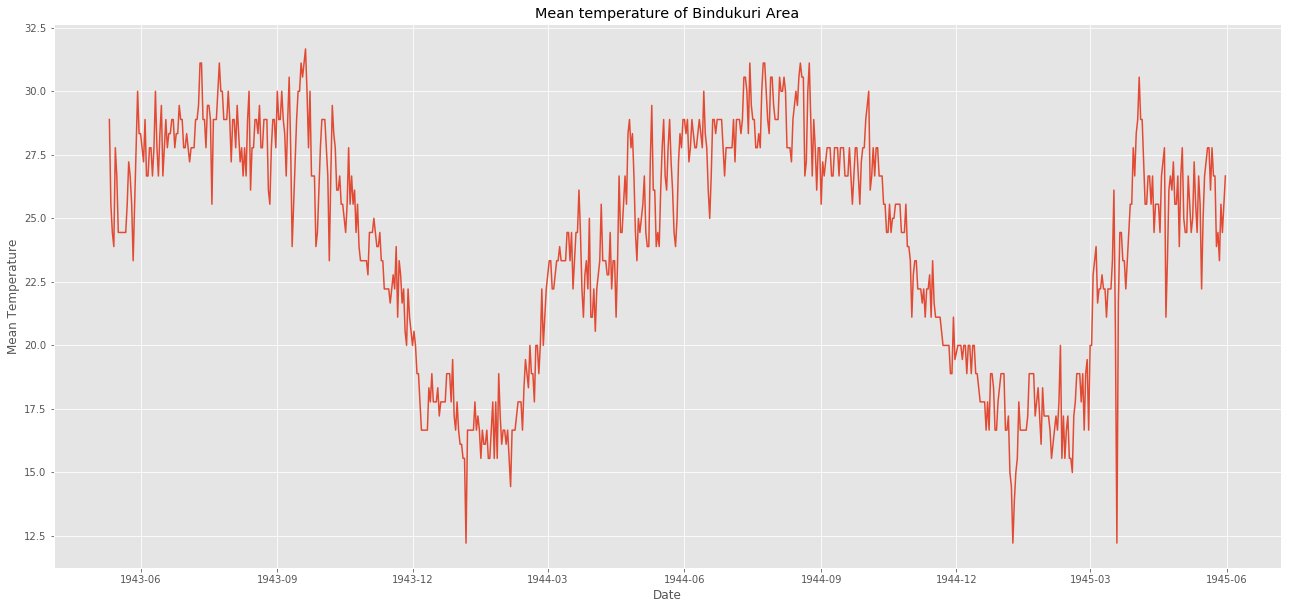

In [19]:
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

### Observations:
-  Temperature measurement between 1943 to 1945
-  Temp oscillates between 12 and 32 degrees
-  Temp in winter is colder than that of summer

In [20]:
aerial = pd.read_csv("/Users/r0m00tf/Downloads/datasets/ww2/world war 2 bombings operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"] >="1943"]
aerial = aerial[aerial["month"] >= "8"]
aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])
attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country== attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [21]:
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date==each]
    liste.append(dummy["MeanTemp"].values)

aerial_war["dene"] = liste
for each in aerial_war["dene"].values:
    aa.append(each[0])
    
#creating a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = "rgba(16,112,2,0.8)"),
    name = "Mean temperature"
)

trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color="rgba(16,0,200,1)"),
)

layout = dict(title="Mean temperature --- Bombing Dates and Mean Temperture at this date")
data = [trace,trace1]

fig = dict(data=data, layout = layout)
iplot(fig)

### Conclusion from the above graphs:
- Green Line is mean temperature and that is measures in Bindukuri
- Blue markers are bombin dates and bombing date temperature
- As it can be seen from the plot, USA bombs at higher temperatures
    - The question is whether we can predict future weather and according to this prediction can we know ehether bombing will be done or not
    

### Time Series Prediction with ARIMA
- ARIMA : AutoRegressive Integrated Moving Average


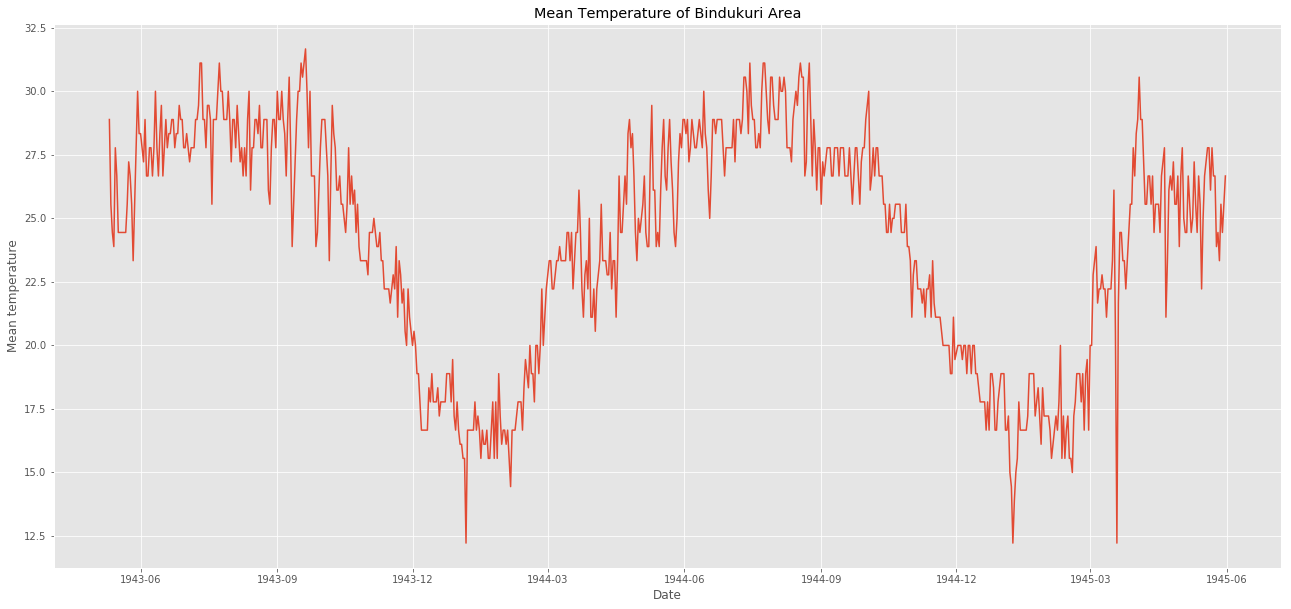

In [22]:
#mean temperature of Bindukuri Area
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean temperature")
plt.show()

#let's create time series from weather
timeSeries = weather_bin.loc[:,["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

#### Checking stationarity of time series:
- Plotting Rolling Statistics: We have a window (size = 6), we then find rollin mean and variance to check stationarity
- Dickey Fuller Test: The test results comprise of a Test Statistic and some critical values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary


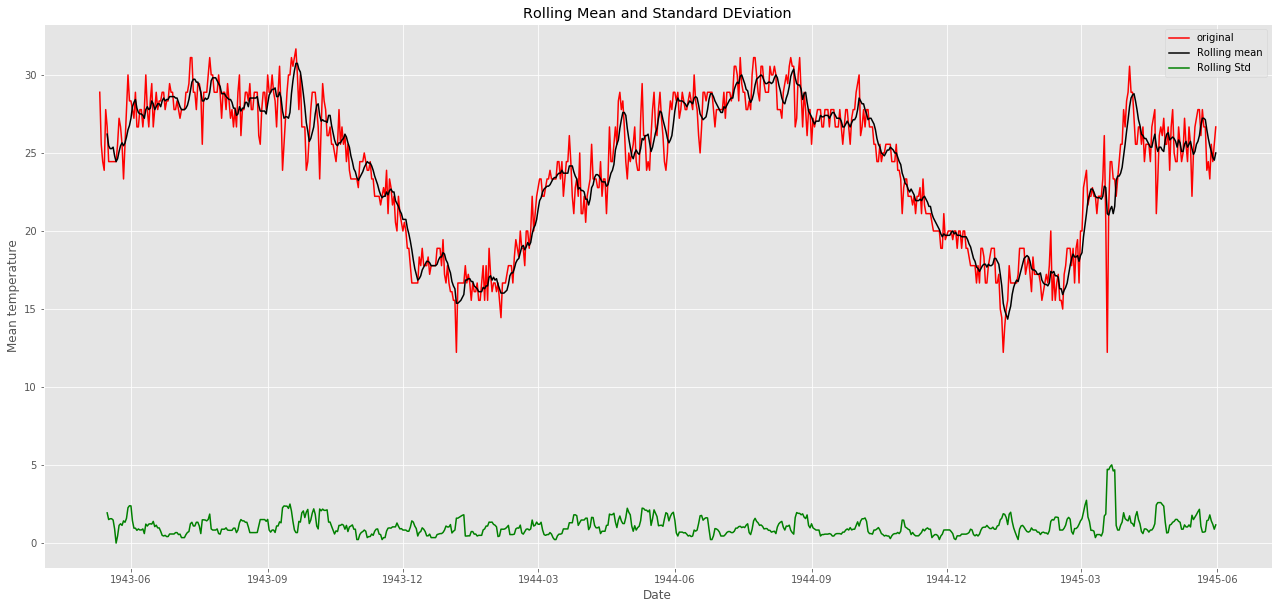

('Test Statistic: ', -1.4095966745887676)
('p-value: ', 0.5776668028526396)
('Critical Values: ', {'5%': -2.86545894814762, '1%': -3.439229783394421, '10%': -2.5688568756191392})


In [23]:
#adfuller library
from statsmodels.tsa.stattools import adfuller
#check adfuller:
def check_adfuller(ts):
    #dickey Fuller test:
    result = adfuller(ts,autolag="AIC")
    print("Test Statistic: ", result[0])
    print("p-value: ", result[1])
    print("Critical Values: ", result[4])
    
#check mean std:
def check_mean_std(ts):
    #rolling statistics
    rolmean = pd.rolling_mean(ts,window=6)
    rolstd = pd.rolling_std(ts,window=6)
    plt.figure(figsize=(22,10))
    orig = plt.plot(ts,color="red",label="original")
    mean = plt.plot(rolmean,color="black",label="Rolling mean")
    std = plt.plot(rolstd,color="green",label="Rolling Std")
    plt.xlabel("Date")
    plt.ylabel("Mean temperature")
    plt.title("Rolling Mean and Standard DEviation")
    plt.legend()
    plt.show()
    
#check stationarity: mean, variance(std) and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)

- 1st criteria for stationarity is constant mean. we fail because from black line we can see that mean is not constant, which means this is non-stationary
- 2nd one is constant variance. Looks constant (so stationary)
- 3rd one is test statistic: it's bigger than critical values so not stationary

##### we can conclude that the ts is not stationary so let's make it


#### How to make time series stationary:
2 reasons behind the time series being non-stationary:
- trend: varying mean over time. 
- seasonality - variations at specific time 

First solve the trend(constant mean) problem:
- most popular method is movin average
    - we have window that takes the average over the past n samples.  where n is the window size

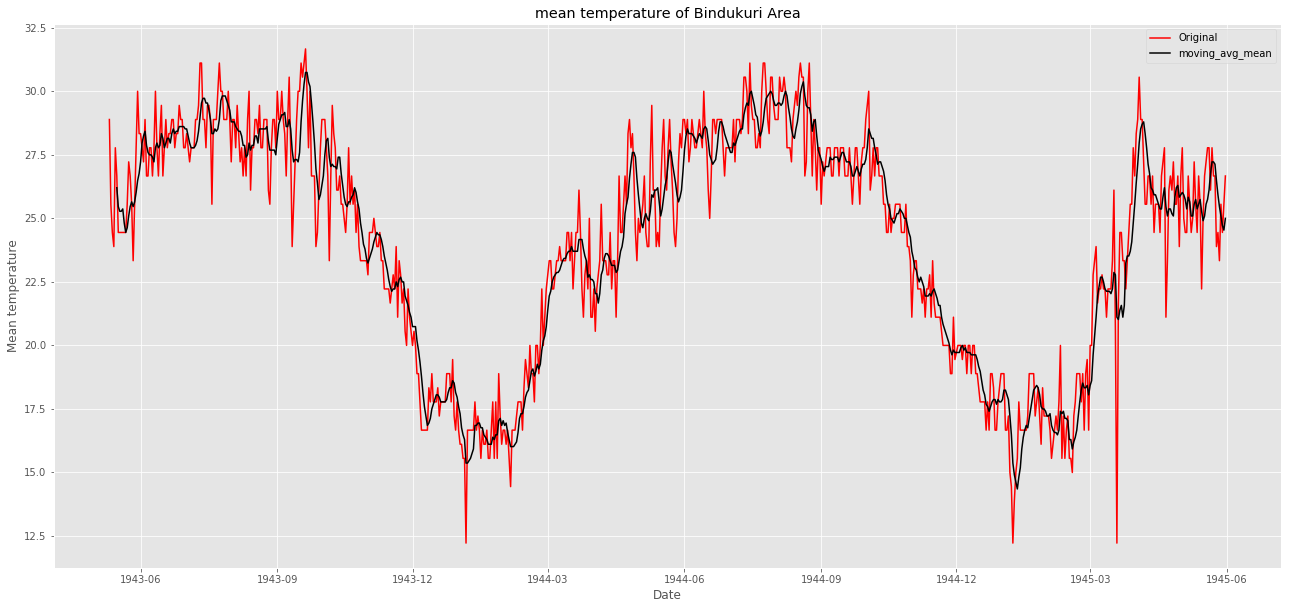

In [24]:
#moving average method:
window_size = 6
moving_avg = pd.rolling_mean(ts,window_size)
plt.figure(figsize=(22,10))
plt.plot(ts,color="red",label="Original")
plt.plot(moving_avg, color="black",label="moving_avg_mean")
plt.title("mean temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean temperature")
plt.legend()
plt.show()

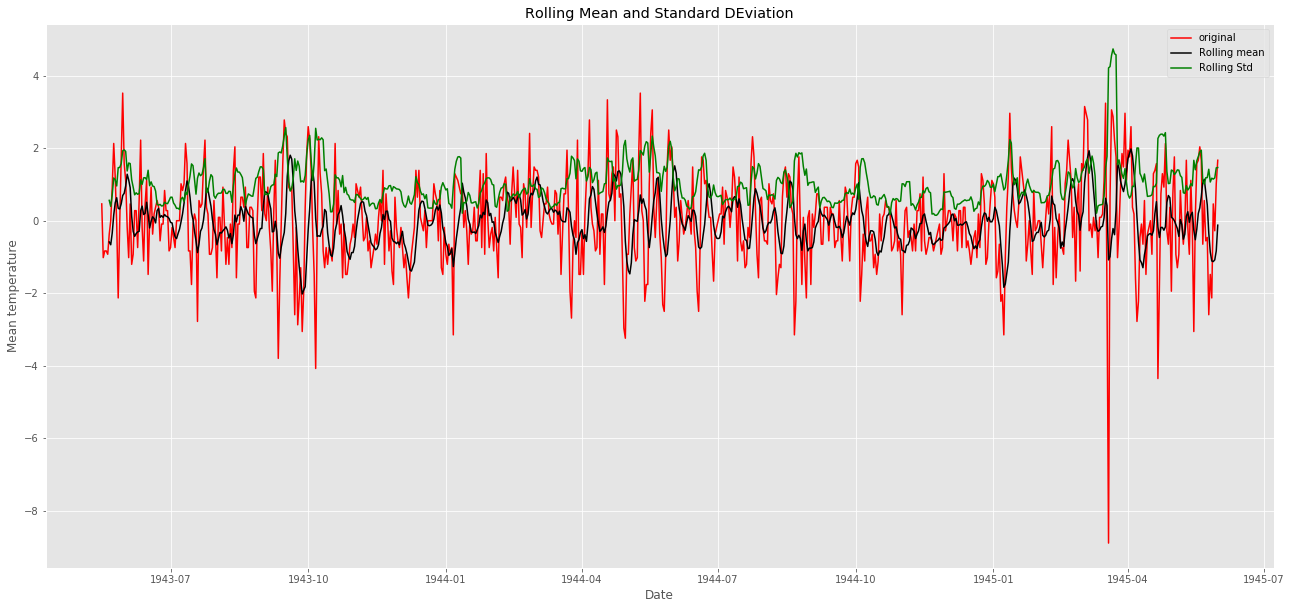

('Test Statistic: ', -11.138514335138481)
('p-value: ', 3.150868563164471e-20)
('Critical Values: ', {'5%': -2.86546960465041, '1%': -3.4392539652094154, '10%': -2.5688625527782327})


In [25]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) #first 6 is NAN value to window size

#check stationarity now
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.MeanTemp)

#### Conclusion from above:
- Constant mean criteria: mean looks constant(black line), so is stationary now
- constant variance : variance looks constant( green line), so is stationary now
- test statistic is smaller than 1 percent cricitcal values so 99 percent confidence that this is a stationary series, so is stationary now

#### Another method:
differencing method: take difference between time series and shifted time series

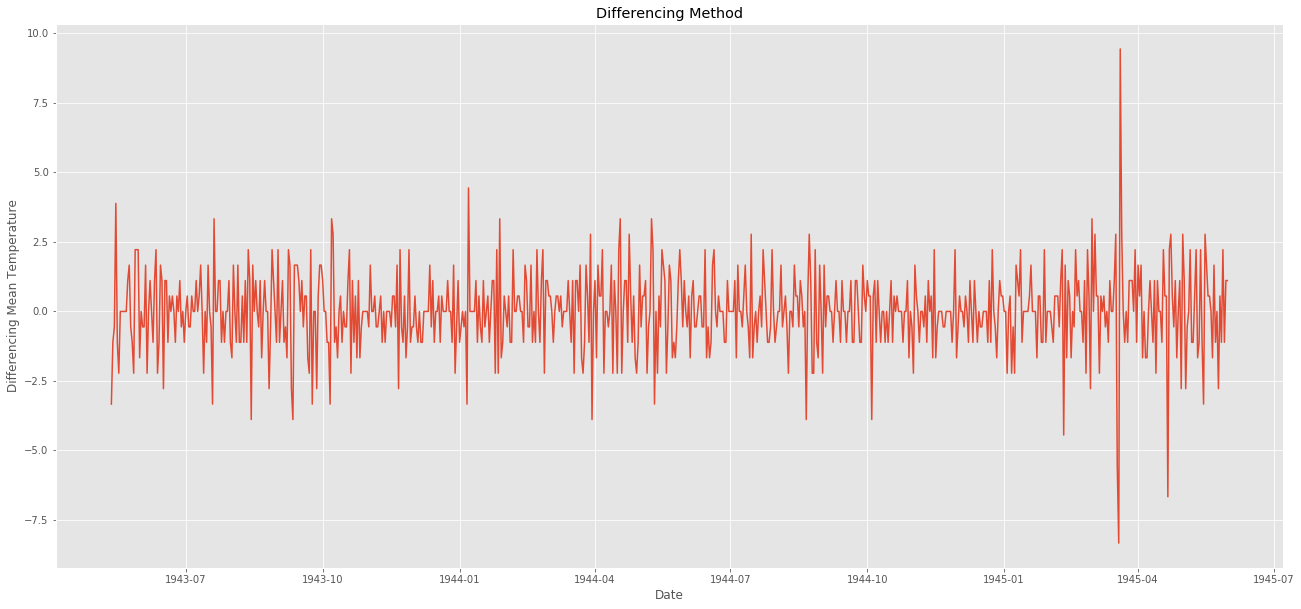

In [26]:
#differencing method:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing Method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

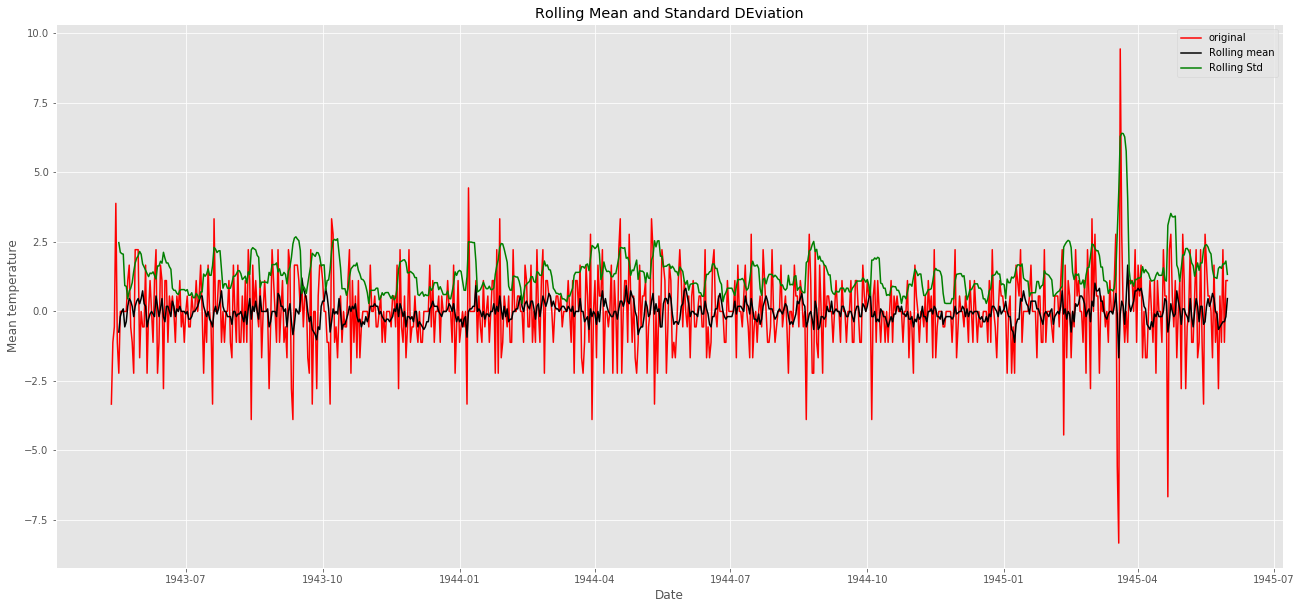

('Test Statistic: ', -11.678955575105366)
('p-value: ', 1.760207569355997e-21)
('Critical Values: ', {'5%': -2.86545894814762, '1%': -3.439229783394421, '10%': -2.5688568756191392})


In [27]:
ts_diff.dropna(inplace=True)
check_mean_std(ts_diff)
check_adfuller(ts_diff.MeanTemp)

SAME CONCLUSION AS ABOVE

### Forecasting a Time Series
- We learnt above 2 different methods are moving average and differencing methods to avoid trend and seasonality problem
- for prediction, let's use ts_diff time series. no specific reason
- prediction method would be ARIMA:
    - AR - Auto Regressive: AR terms are just lags dependent variable. For eg if p os 3, we will use x(t-1), x(t-2) and x(t-3) to predict x(t)
    - I: Integrated: Number of non-seasonal differences. For eg, we take first order difference, So we pass that variable and put d = 0
    - MA : Moving Averages(q) MA terms are lagged forecast errors in prediction equation
    - (p,d,q) are parameters of ARIMA model
    - In order to choose p,d,q,we will use 2 different plots:
        - ACF : AutoCorrelation Function: Measurement of the correlation between time series and lagged version of time series
        - PACF: Partial Autocorrelation Function: This measures the correlation between time series and lagged version of time series but after eliminating teh variations already explainged by the intervening comparisons
        

Text(0.5,1,u'Autocorrelation Function')

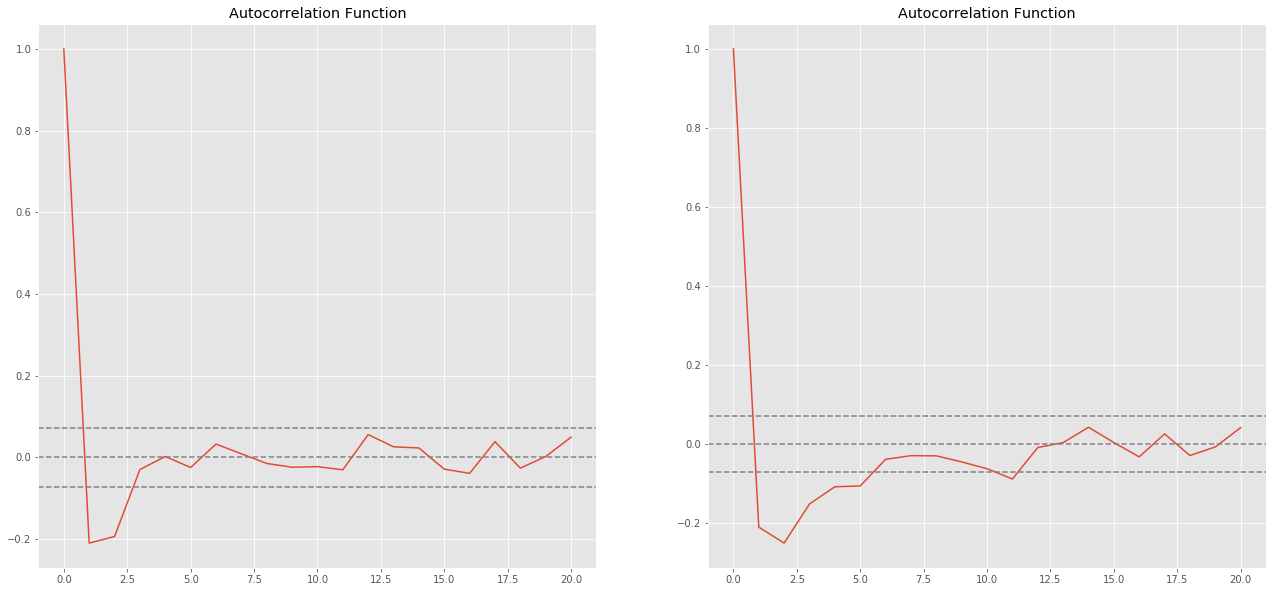

In [28]:
#ACF and PACF
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(ts_diff,nlags=20)
lag_pacf = pacf(ts_diff,nlags = 20, method="ols")
#ACF 
plt.figure(figsize=(22,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle="--",color="gray")
plt.title("Autocorrelation Function")

#PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle="--",color="gray")
plt.title("Autocorrelation Function")

- Two dotted lines are the confidence intervals. We use these lines to determine the p and q values
    - Choosing p: the lag value where the PACF chart crosses the upper confidence interval for the first time , p =1
    - Choosing q: the lag value where the ACF chart crossed the ipper confidence interval for the first time, q = 1
- Now let's use (1,0,1) as parameters for the ARIMA models and predict:
    - ARIMA: from statsmodel library
    - datetime : we will use it start and end indexes of predict method
    

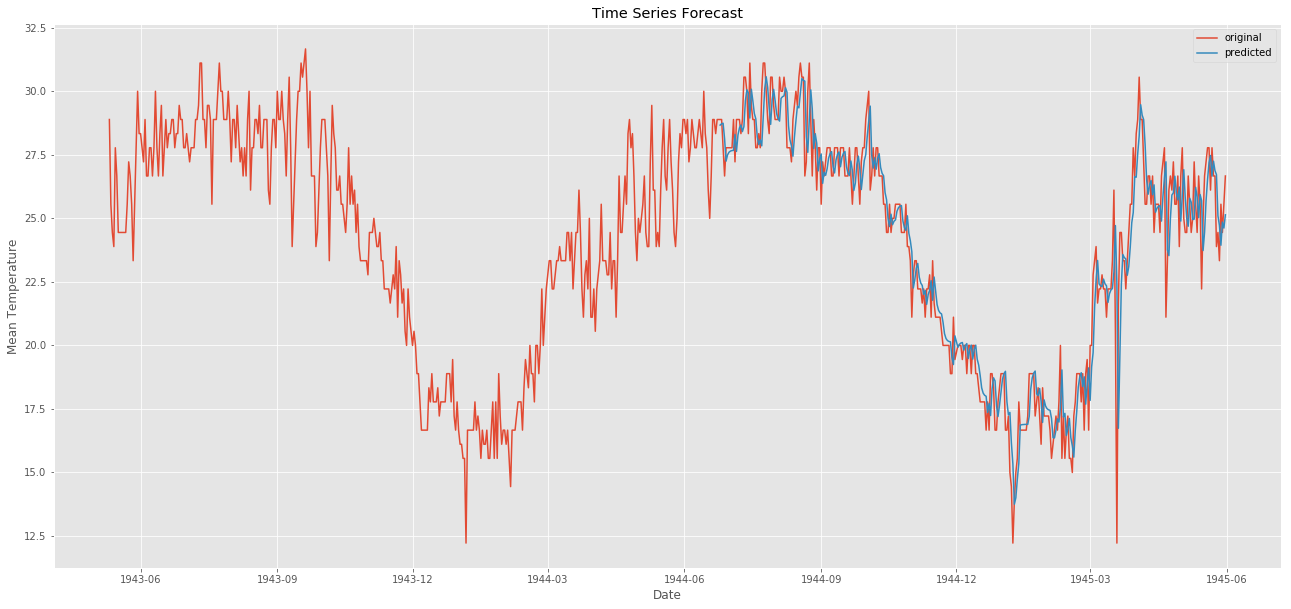

In [29]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
#start_index = datetime(1944, 6, 25)
#end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start='1944-06-25',end='1945-05-31')

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

#NOTE TO SELF: THERE WAS A VERSION ISSUE, HAD TO DOWNGRADE STATMODELS 0.9 TO 0.8

('error: ', 1.862581713902051)


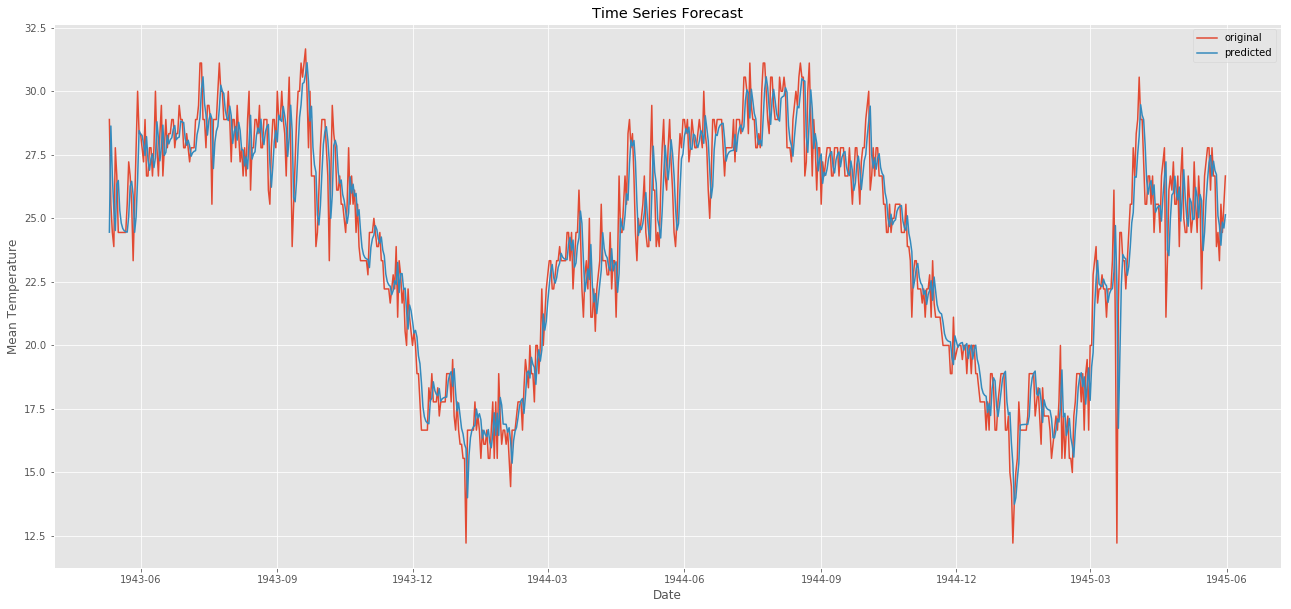

In [31]:
#fininfg the mean squared error
from sklearn.metrics import mean_squared_error
#fit model
model2 = ARIMA(ts,order=(1,0,1))
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts,forecast2)
print("error: ",error)
#visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date, weather_bin.MeanTemp, label="original")
plt.plot(forecast2,label="predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('/Users/r0m00tf/Downloads/datasets/ww2/prediction_graph.png')

plt.show()